In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '/cluster/home/omineeva/ResMiCo')
from resmico import utils
from pathlib import Path

2022-01-19 17:28:10.606649: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
import seaborn as sns
sns.set(font_scale=1.2, style="whitegrid")

In [8]:
project_path = '/cluster/home/omineeva/global_projects/projects/projects2019-contig_quality/'
path=project_path+'Outputs/predictions/'
pred_path = project_path+'Outputs/predictions/'

In [10]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import time

In [6]:
test_data_path = project_path+'data/v2/resmico-sm/GTDBr202_n9k_novel-family_test/'

In [21]:
name = 'test-upcov_mc44_aucPR_0.685.csv'
df_novel = pd.read_csv(pred_path+'0-'+name)
df_gut = pd.read_csv(pred_path+'1-'+name)
df_oral = pd.read_csv(pred_path+'2-'+name)
df_skin = pd.read_csv(pred_path+'3-'+name)
df_valid = pd.read_csv(pred_path+'4-'+name)

/cluster/home/omineeva/global_projects/projects/projects2019-contig_quality//Outputs/figures/PRcurve_auroc.pdf


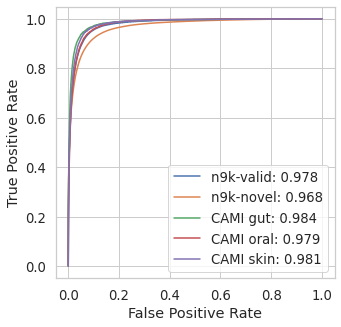

In [23]:
df_names = ['n9k-valid', 'n9k-novel', 'CAMI gut', 'CAMI oral', 'CAMI skin']
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
for i, df in enumerate([df_valid, df_novel, df_gut, df_oral, df_skin,]):
    auc = roc_auc_score(df.label>0, df.score)
    fpr, tpr, _ = roc_curve(df.label>0, df.score)

    plt.plot(fpr, tpr,
             label=df_names[i]+': %.3f' % (auc))
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
    
dataset_name = 'auroc'
where = project_path+'/Outputs/figures/PRcurve_'+dataset_name+'.pdf'
plt.savefig(where, bbox_inches='tight', format='pdf', dpi=300)
print(where)

plt.show()

In [ ]:
#predict on validation set